# Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.
https://www.sciencedirect.com/science/article/pii/S0377221716000412

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df= pd.read_csv(r"C:\Users\dell\Desktop\data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
Bankrupt?                                                   6819 non-null int64
 ROA(C) before interest and depreciation before interest    6819 non-null float64
 ROA(A) before interest and % after tax                     6819 non-null float64
 ROA(B) before interest and depreciation after tax          6819 non-null float64
 Operating Gross Margin                                     6819 non-null float64
 Realized Sales Gross Margin                                6819 non-null float64
 Operating Profit Rate                                      6819 non-null float64
 Pre-tax net Interest Rate                                  6819 non-null float64
 After-tax net Interest Rate                                6819 non-null float64
 Non-industry income and expenditure/revenue                6819 non-null float64
 Continuous interest rate (after tax)                       6819 non-null f

In [6]:
# create X and Y data for further analysis
X = df.drop(["Bankrupt?"], axis=1)
y = df["Bankrupt?"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# PCA 
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
# reduce dimentionality 
X_train.shape,X_test.shape

((4773, 15), (2046, 15))

In [11]:
models = [LogisticRegression(),RandomForestClassifier(),
          DecisionTreeClassifier(), KNeighborsClassifier(),
         GaussianNB(),SVC(),GradientBoostingClassifier()]

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
    

In [13]:
log_reg= LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Text(0.5, 1.0, 'Auc Score is :0.6004696167215213')

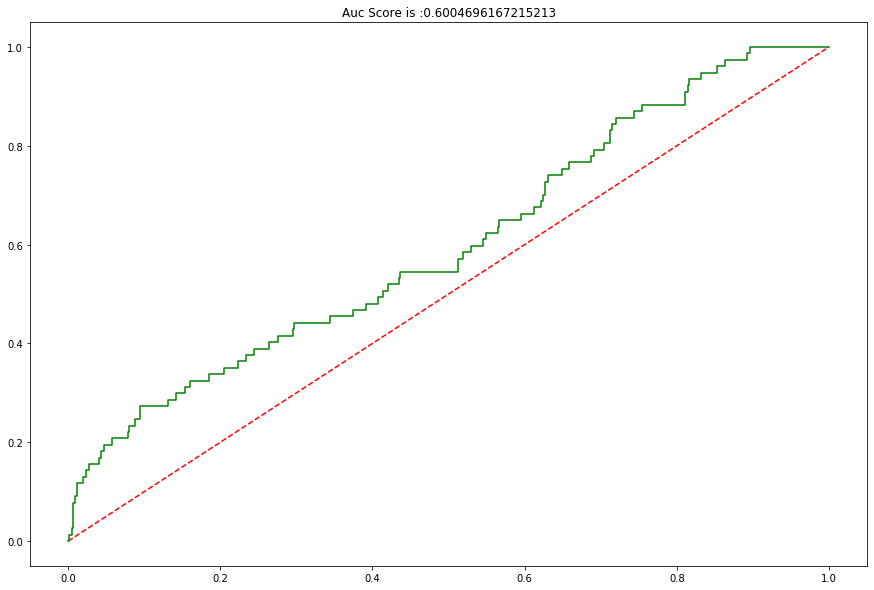

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
log_reg= LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg.fit(X_train,y_train)
log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,method="decision_function")
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold= roc_curve(y_test,log_reg_pred)
plt.figure(figsize=(15,10))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,'g')
plt.title('Auc Score is :'+str(auc(fpr,tpr)))

# Models comparison with ROC curves

In [15]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr,pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr,pos_label=1)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf,pos_label=1)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf,pos_label=1)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear,pos_label=1)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear,pos_label=1)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN,pos_label=1)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN,pos_label=1)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree,pos_label=1)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree,pos_label=1)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf,pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf,pos_label=1)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb,pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb,pos_label=1)

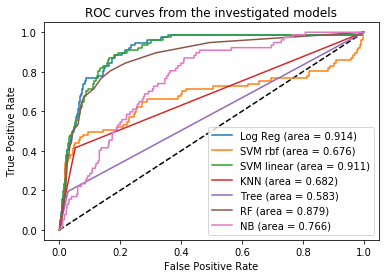

In [17]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# Decision Tree Algorithm

[[1653    0]
 [   0   52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00        52

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705



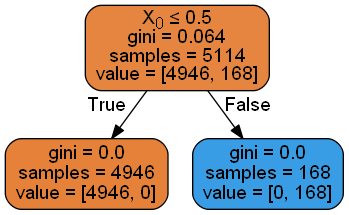

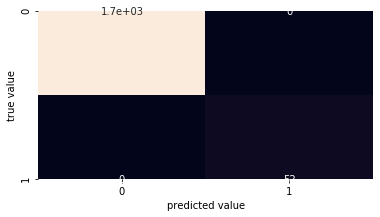

In [19]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x1 = df.apply(le.fit_transform)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=0)
y=y.values.reshape(-1,1)
classifier=DecisionTreeClassifier()
classifier=classifier.fit(x1_train,y_train)
y_model= classifier.predict(x1_test)
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_model))
print(classification_report(y_test, y_model))
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())